PYTORCH

In [ ]:
# Setting Up PyTorch
!pip install torch torchvision


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the network class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=3)  # Input layer to hidden layer
        self.relu = nn.ReLU()                                   # Non-linear activation function
        self.layer2 = nn.Linear(in_features=3, out_features=1)  # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()                             # Output layer activation

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

# Initialize the network
net = SimpleNN()
print(net)

# Example input
input_features = torch.tensor([[1.0, 2.0]])
output = net(input_features)
print("Output of the network:", output)


SimpleNN(
  (layer1): Linear(in_features=2, out_features=3, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Output of the network: tensor([[0.4659]], grad_fn=<SigmoidBackward0>)


In [ ]:
# Dummy dataset
inputs = torch.randn(100, 2)
targets = torch.where((inputs[:, 0] + inputs[:, 1] > 0), 1.0, 0.0).view(-1, 1)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if (epoch) % 10 == 0:
        print(f'Epoch [{epoch + 1}/100], Loss: {loss.item():.4f}')


Epoch [1/100], Loss: 0.6220
Epoch [11/100], Loss: 0.5743
Epoch [21/100], Loss: 0.5299
Epoch [31/100], Loss: 0.4886
Epoch [41/100], Loss: 0.4511
Epoch [51/100], Loss: 0.4179
Epoch [61/100], Loss: 0.3880
Epoch [71/100], Loss: 0.3616
Epoch [81/100], Loss: 0.3378
Epoch [91/100], Loss: 0.3165


In [ ]:
class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.layer1 = nn.Linear(2, 5)
        self.relu = nn.ReLU()
        self.batch_norm1 = nn.BatchNorm1d(5)
        self.dropout = nn.Dropout(0.25)
        self.layer2 = nn.Linear(5, 3)
        self.layer3 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.batch_norm1(x)
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Redefine the net with the new complex architecture
net = ComplexNN()
print(net)

# Re-run training code from the previous example here...


ComplexNN(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (batch_norm1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (layer2): Linear(in_features=5, out_features=3, bias=True)
  (layer3): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
class ActivationVariationNN(nn.Module):
    def __init__(self):
        super(ActivationVariationNN, self).__init__()
        self.layer1 = nn.Linear(2, 5)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(5, 3)
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.layer3 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.tanh(self.layer1(x))
        x = self.leaky_relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Instantiate and print the network with varied activations
net = ActivationVariationNN()
print(net)


ActivationVariationNN(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (tanh): Tanh()
  (layer2): Linear(in_features=5, out_features=3, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
  (layer3): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

# Generate some synthetic data
X = torch.randn(100, 10)
y = torch.randn(100, 1)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.numpy())

# Convert to tensors
X_scaled = torch.tensor(X_scaled).float()
y = torch.tensor(y).float()

# Create DataLoader for batch processing
dataset = TensorDataset(X_scaled, y)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)


/tmp/ipython-input-29-2495399561.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y).float()


In [ ]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(10, 20)
        self.layer2 = nn.Linear(20, 10)
        self.output_layer = nn.Linear(10, 1)
        self.relu = nn.ReLU()  # Consider trying nn.LeakyReLU() or nn.ELU() as alternatives

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

model = Model()


In [ ]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

#model = Model()
#model.apply(init_weights)


In [ ]:
class BNModel(nn.Module):
    def __init__(self):
        super(BNModel, self).__init__()
        self.layer1 = nn.Linear(10, 20)
        self.bn1 = nn.BatchNorm1d(20)
        self.layer2 = nn.Linear(20, 10)
        self.bn2 = nn.BatchNorm1d(10)
        self.output_layer = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.bn1(self.relu(self.layer1(x)))
        x = self.bn2(self.relu(self.layer2(x)))
        x = self.output_layer(x)
        return x

bn_model = BNModel()


In [ ]:
class DropoutModel(nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.layer1 = nn.Linear(10, 20)
        self.dropout = nn.Dropout(0.5)
        self.layer2 = nn.Linear(20, 10)
        self.output_layer = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.dropout(self.relu(self.layer1(x)))
        x = self.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

dropout_model = DropoutModel()


In [ ]:
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

# In your training loop
for epoch in range(100):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = nn.MSELoss()(outputs, targets)
        loss.backward()
        optimizer.step()
    scheduler.step()  # Adjust the learning rate
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.7412849068641663
Epoch 2, Loss: 0.3205733597278595
Epoch 3, Loss: 0.7227745056152344
Epoch 4, Loss: 0.517609715461731
Epoch 5, Loss: 0.7097479104995728
Epoch 6, Loss: 0.6402806043624878
Epoch 7, Loss: 0.5398072600364685
Epoch 8, Loss: 0.3841018080711365
Epoch 9, Loss: 0.4851917624473572
Epoch 10, Loss: 0.5947397351264954
Epoch 11, Loss: 0.1719275861978531
Epoch 12, Loss: 0.5661917328834534
Epoch 13, Loss: 0.7199599742889404
Epoch 14, Loss: 0.5648065805435181
Epoch 15, Loss: 0.6196472644805908
Epoch 16, Loss: 0.4122537672519684
Epoch 17, Loss: 0.27597060799598694
Epoch 18, Loss: 0.5581009387969971
Epoch 19, Loss: 0.8414187431335449
Epoch 20, Loss: 0.49913081526756287
Epoch 21, Loss: 0.4268468916416168
Epoch 22, Loss: 0.7739464640617371
Epoch 23, Loss: 0.5183636546134949
Epoch 24, Loss: 1.3159595727920532
Epoch 25, Loss: 0.6862703561782837
Epoch 26, Loss: 0.7322108149528503
Epoch 27, Loss: 0.321794718503952
Epoch 28, Loss: 0.6697968244552612
Epoch 29, Loss: 0.83991211652

MNIST

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim


# Transformations applied on each image
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the MNIST dataset
])

# Downloading the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
import torch.nn as nn

class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()  # Instantiate ReLU
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()  # Instantiate ReLU
        self.fc3 = nn.Linear(64, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)  # Apply ReLU
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)  # Apply ReLU
        x = self.fc3(x)
        return x


net = MNISTNet().to("cuda:0")
net.apply(init_weights)

optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


Epoch 1/10 completed. Loss: 0.2914
Epoch 2/10 completed. Loss: 0.1483
Epoch 3/10 completed. Loss: 0.3101
Epoch 4/10 completed. Loss: 0.1982
Epoch 5/10 completed. Loss: 0.0655
Epoch 6/10 completed. Loss: 0.1553
Epoch 7/10 completed. Loss: 0.0284
Epoch 8/10 completed. Loss: 0.4209
Epoch 9/10 completed. Loss: 0.1996
Epoch 10/10 completed. Loss: 0.0206


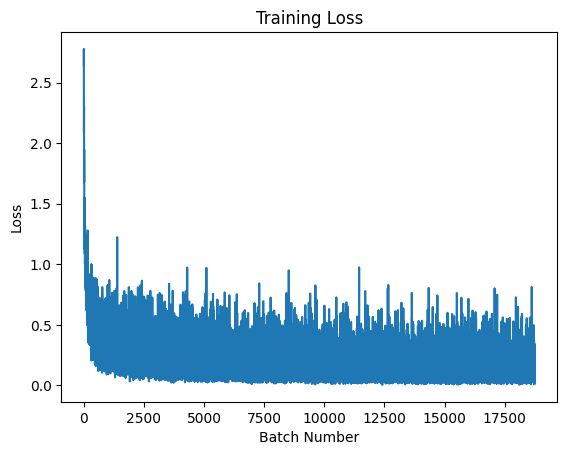

In [ ]:
def train(epochs, net, train_loader, optimizer, scheduler):
    net.train()
    loss_history = []

    for epoch in range(epochs):
        for data, target in train_loader:
            data, target = data.to("cuda:0"), target.to("cuda:0")
            optimizer.zero_grad()
            output = net(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())
        scheduler.step()
        print(f"Epoch {epoch+1}/{epochs} completed. Loss: {loss.item():.4f}")

    plt.plot(loss_history)
    plt.title("Training Loss")
    plt.xlabel("Batch Number")
    plt.ylabel("Loss")
    plt.show()

train(10, net, train_loader, optimizer, scheduler)



Test set: Average loss: 0.0024, Accuracy: 9755/10000 (98%)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.95      0.96      1028
           8       0.98      0.95      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

F1 Score: 0.9754541045747193


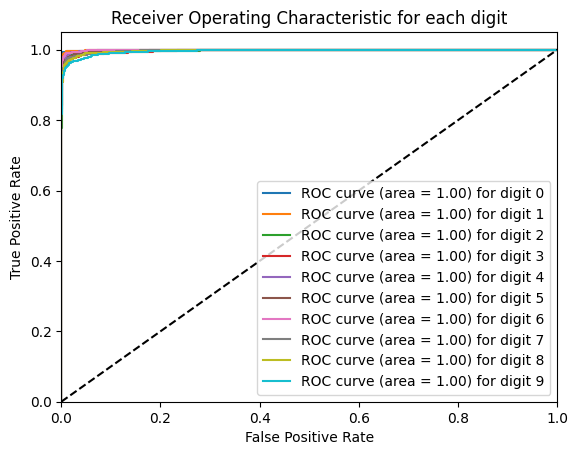

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

def evaluate(net, test_loader):
    net.eval()
    test_loss = 0
    correct = 0
    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for data, target in test_loader:
            data = data.to("cuda:0")
            target = target.to("cuda:0")
            output = net(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).detach().cpu().sum().item()
            all_targets.extend(target.view_as(pred).detach().cpu().numpy())
            all_outputs.extend(output.detach().cpu().numpy())

    # Calculate metrics
    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')

    # Classification report and F1-Score
    all_preds = np.argmax(all_outputs, axis=1)
    print(classification_report(all_targets, all_preds))
    print("F1 Score:", f1_score(all_targets, all_preds, average='macro'))

    # ROC Curve for each class
    targets_one_hot = label_binarize(all_targets, classes=np.arange(10))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(targets_one_hot[:, i], np.array(all_outputs)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve for each class
    plt.figure()
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for digit {i}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for each digit')
    plt.legend(loc="lower right")
    plt.show()

evaluate(net, test_loader)


CIFAR 10

In [ ]:
import torch.multiprocessing as mp

# Use torch.multiprocessing instead of multiprocessing
mp.set_start_method('spawn', force=True)

import torch
import torchvision
import torchvision.transforms as transforms

# Data transformation with normalization
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize RGB channels

# Loading the training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

# Loading the test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 3 input channels (RGB), 6 output channels, 5x5 square convolution
        self.pool = nn.MaxPool2d(2, 2)   # Max pooling over a (2, 2) window
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 28x28x6 - > pool ->14x14x6
        x = self.pool(F.relu(self.conv2(x))) # 10x10x16 - > pool -> 5x5x16
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to("cuda:0")


[1,   200] loss: 2.302
[1,   400] loss: 2.300
[1,   600] loss: 2.296
[2,   200] loss: 2.266
[2,   400] loss: 2.229
[2,   600] loss: 2.167
Finished Training


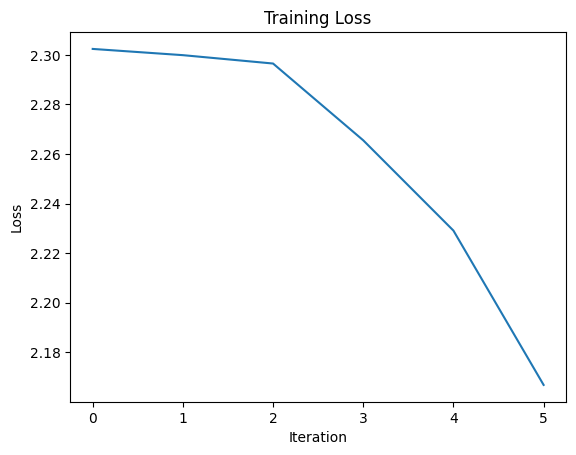

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training the network
loss_history = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to("cuda:0"), labels.to("cuda:0")

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            loss_history.append(running_loss / 200)
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

# Plotting the training loss
plt.figure()
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to("cuda:0"), labels.to("cuda:0")
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 26 %


FMNIST

In [ ]:
# Install dependencies (if needed)
# !pip install torch torchvision

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# ----------------------------
# Load FMNIST dataset
# ----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

# ----------------------------
# Define a simple NN (SimpleNN)
# ----------------------------
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleNN()
print(net)

# ----------------------------
# Training loop for SimpleNN
# ----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

def train_model(net, epochs=5):
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

train_model(net)

# ----------------------------
# Define a complex NN (ComplexNN)
# ----------------------------
class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = ComplexNN()
print(net)

# ----------------------------
# Training loop for ComplexNN
# ----------------------------
optimizer = optim.Adam(net.parameters(), lr=0.001)
train_model(net)

# ----------------------------
# Evaluation
# ----------------------------
def evaluate_model(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

evaluate_model(net)


SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Epoch 1, Loss: 0.8023
Epoch 2, Loss: 0.5240
Epoch 3, Loss: 0.4743
Epoch 4, Loss: 0.4469
Epoch 5, Loss: 0.4279
ComplexNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)
Epoch 1, Loss: 0.4933
Epoch 2, Loss: 0.3829
Epoch 3, Loss: 0.3520
Epoch 4, Loss: 0.3304
Epoch 5, Loss: 0.3114
Test Accuracy: 86.97%


LeNET-5

ALEXNET

GOOGLENET

VGGNET

XCEPTION

RESNET


=== Training ResNet-18 on MNIST ===
Epoch 1, Loss: 0.1327
Epoch 2, Loss: 0.0343
Epoch 3, Loss: 0.0237
Epoch 4, Loss: 0.0198
Epoch 5, Loss: 0.0162


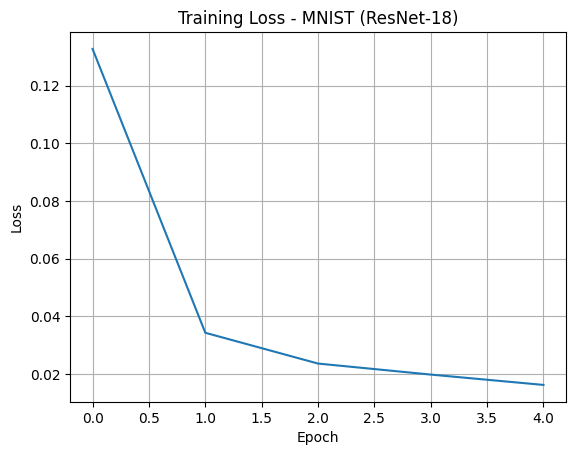


Classification Report for MNIST (ResNet-18):
              precision    recall  f1-score   support

           0     0.9939    0.9969    0.9954       980
           1     0.9939    0.9974    0.9956      1135
           2     0.9932    0.9864    0.9898      1032
           3     0.9970    0.9851    0.9910      1010
           4     0.9939    0.9898    0.9918       982
           5     0.9791    0.9955    0.9872       892
           6     0.9968    0.9833    0.9900       958
           7     0.9855    0.9942    0.9898      1028
           8     0.9848    0.9969    0.9908       974
           9     0.9940    0.9871    0.9906      1009

    accuracy                         0.9913     10000
   macro avg     0.9912    0.9913    0.9912     10000
weighted avg     0.9913    0.9913    0.9913     10000


=== Training ResNet-18 on FMNIST ===
Epoch 1, Loss: 0.4162
Epoch 2, Loss: 0.2434
Epoch 3, Loss: 0.1965
Epoch 4, Loss: 0.1586
Epoch 5, Loss: 0.1241


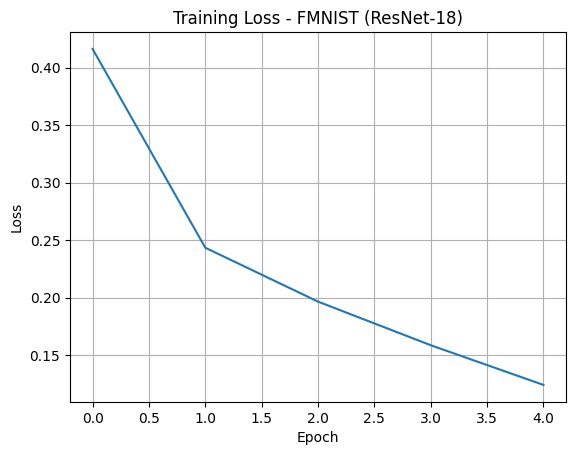


Classification Report for FMNIST (ResNet-18):
              precision    recall  f1-score   support

           0     0.7718    0.9370    0.8464      1000
           1     0.9960    0.9890    0.9925      1000
           2     0.9039    0.8650    0.8840      1000
           3     0.9378    0.9190    0.9283      1000
           4     0.7698    0.9600    0.8545      1000
           5     0.9939    0.9760    0.9849      1000
           6     0.8821    0.5310    0.6629      1000
           7     0.9587    0.9740    0.9663      1000
           8     0.9831    0.9910    0.9871      1000
           9     0.9710    0.9720    0.9715      1000

    accuracy                         0.9114     10000
   macro avg     0.9168    0.9114    0.9078     10000
weighted avg     0.9168    0.9114    0.9078     10000


=== Training ResNet-18 on CIFAR10 ===
Epoch 1, Loss: 1.2689
Epoch 2, Loss: 0.8176
Epoch 3, Loss: 0.6036
Epoch 4, Loss: 0.4411
Epoch 5, Loss: 0.2974


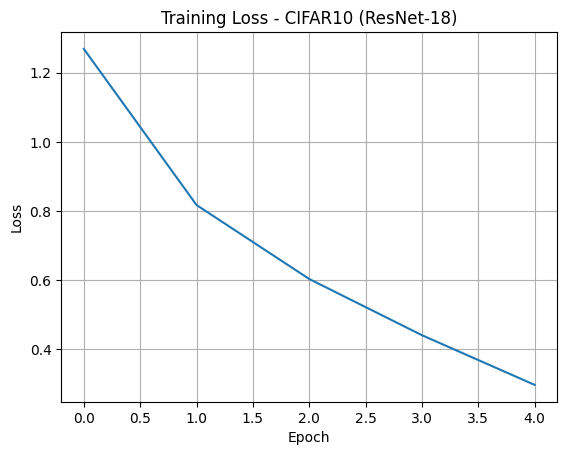


Classification Report for CIFAR10 (ResNet-18):
              precision    recall  f1-score   support

           0     0.8541    0.7320    0.7884      1000
           1     0.9433    0.8480    0.8931      1000
           2     0.7829    0.5950    0.6761      1000
           3     0.6792    0.5590    0.6133      1000
           4     0.6071    0.8700    0.7152      1000
           5     0.5614    0.8370    0.6720      1000
           6     0.8156    0.8180    0.8168      1000
           7     0.8307    0.6920    0.7550      1000
           8     0.9002    0.8570    0.8781      1000
           9     0.8988    0.8530    0.8753      1000

    accuracy                         0.7661     10000
   macro avg     0.7873    0.7661    0.7683     10000
weighted avg     0.7873    0.7661    0.7683     10000



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from torchvision.models import resnet18, ResNet18_Weights

# ----------------------
# Load Dataset
# ----------------------
def load_data(dataset_name):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    if dataset_name == 'MNIST':
        dataset = torchvision.datasets.MNIST
    elif dataset_name == 'FMNIST':
        dataset = torchvision.datasets.FashionMNIST
    elif dataset_name == 'CIFAR10':
        dataset = torchvision.datasets.CIFAR10
    else:
        raise ValueError("Unsupported dataset")

    train_set = dataset(root='./data', train=True, download=True, transform=transform)
    test_set = dataset(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=1000, shuffle=False)

    return train_loader, test_loader

# ----------------------
# Training and Evaluation
# ----------------------
def train_and_evaluate(dataset_name):
    print(f"\n=== Training ResNet-18 on {dataset_name} ===")
    train_loader, test_loader = load_data(dataset_name)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = resnet18(weights=None)
    model.fc = nn.Linear(model.fc.in_features, 10)  # Adjust output layer
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    train_loss_history = []

    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Plot loss curve
    plt.plot(train_loss_history)
    plt.title(f"Training Loss - {dataset_name} (ResNet-18)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    print(f"\nClassification Report for {dataset_name} (ResNet-18):")
    print(classification_report(all_labels, all_preds, digits=4))


# ----------------------
# Run on all 3 datasets
# ----------------------
for dataset in ['MNIST', 'FMNIST', 'CIFAR10']:
    train_and_evaluate(dataset)


SENET


=== Training SENet-Like on MNIST ===
Epoch 1, Loss: 0.7734
Epoch 2, Loss: 0.1575
Epoch 3, Loss: 0.1007
Epoch 4, Loss: 0.0762
Epoch 5, Loss: 0.0616


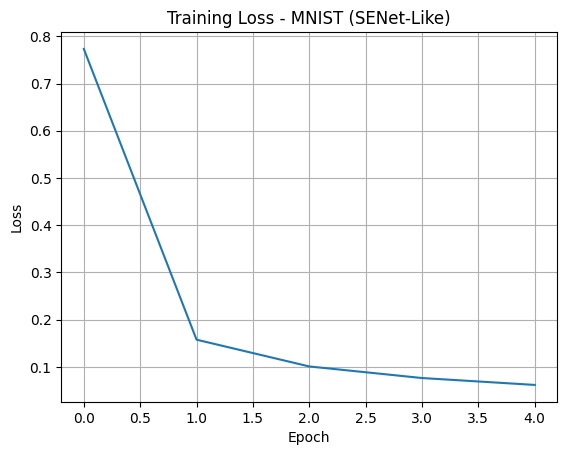


Classification Report for MNIST (SENet-Like):
              precision    recall  f1-score   support

           0     0.9376    0.9959    0.9659       980
           1     0.9929    0.9903    0.9916      1135
           2     0.9693    0.9787    0.9740      1032
           3     0.9822    0.9822    0.9822      1010
           4     0.9926    0.9603    0.9762       982
           5     0.9820    0.9809    0.9815       892
           6     0.9946    0.9530    0.9733       958
           7     0.9368    0.9951    0.9651      1028
           8     0.9914    0.9487    0.9696       974
           9     0.9698    0.9534    0.9615      1009

    accuracy                         0.9742     10000
   macro avg     0.9749    0.9739    0.9741     10000
weighted avg     0.9749    0.9742    0.9742     10000


=== Training SENet-Like on FMNIST ===
Epoch 1, Loss: 0.8841
Epoch 2, Loss: 0.4659
Epoch 3, Loss: 0.3916
Epoch 4, Loss: 0.3554
Epoch 5, Loss: 0.3286


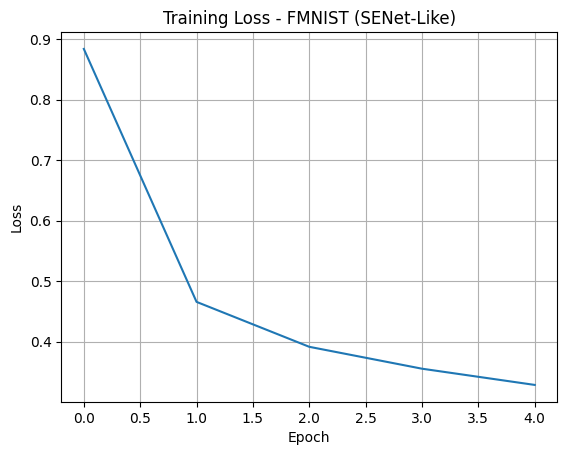


Classification Report for FMNIST (SENet-Like):
              precision    recall  f1-score   support

           0     0.7004    0.9280    0.7983      1000
           1     0.9867    0.9670    0.9768      1000
           2     0.7723    0.8210    0.7959      1000
           3     0.9211    0.7590    0.8322      1000
           4     0.9576    0.4290    0.5925      1000
           5     0.9624    0.9730    0.9677      1000
           6     0.5267    0.7010    0.6015      1000
           7     0.9630    0.9110    0.9363      1000
           8     0.9599    0.9820    0.9708      1000
           9     0.9256    0.9710    0.9478      1000

    accuracy                         0.8442     10000
   macro avg     0.8676    0.8442    0.8420     10000
weighted avg     0.8676    0.8442    0.8420     10000


=== Training SENet-Like on CIFAR10 ===
Epoch 1, Loss: 1.5925
Epoch 2, Loss: 1.2422
Epoch 3, Loss: 1.1296
Epoch 4, Loss: 1.0562
Epoch 5, Loss: 1.0008


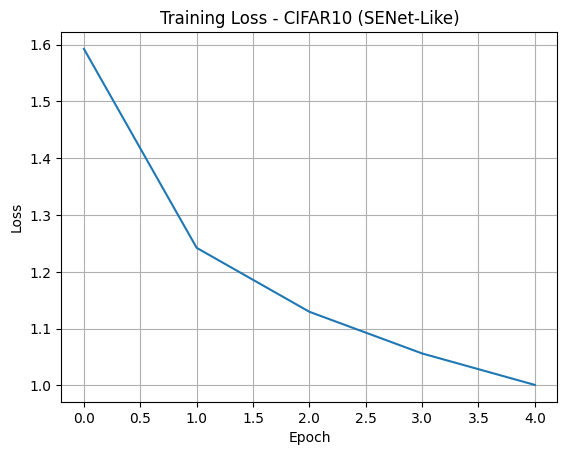


Classification Report for CIFAR10 (SENet-Like):
              precision    recall  f1-score   support

           0     0.6276    0.7060    0.6645      1000
           1     0.7600    0.7980    0.7785      1000
           2     0.4747    0.5910    0.5265      1000
           3     0.4675    0.4600    0.4637      1000
           4     0.6262    0.5160    0.5658      1000
           5     0.6316    0.4920    0.5531      1000
           6     0.6431    0.7910    0.7094      1000
           7     0.7189    0.6880    0.7031      1000
           8     0.7132    0.8180    0.7620      1000
           9     0.8877    0.5850    0.7052      1000

    accuracy                         0.6445     10000
   macro avg     0.6550    0.6445    0.6432     10000
weighted avg     0.6550    0.6445    0.6432     10000



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# ----------------------
# SENet Block
# ----------------------
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

# ----------------------
# SENet-like CNN Model
# ----------------------
class SENetLike(nn.Module):
    def __init__(self, num_classes=10):
        super(SENetLike, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            SEBlock(64),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            SEBlock(128),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            SEBlock(256),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

# ----------------------
# Load Dataset
# ----------------------
def load_data(dataset_name):
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    if dataset_name == 'MNIST':
        dataset = torchvision.datasets.MNIST
    elif dataset_name == 'FMNIST':
        dataset = torchvision.datasets.FashionMNIST
    elif dataset_name == 'CIFAR10':
        dataset = torchvision.datasets.CIFAR10
    else:
        raise ValueError("Unsupported dataset")

    train_set = dataset(root='./data', train=True, download=True, transform=transform)
    test_set = dataset(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=1000, shuffle=False)

    return train_loader, test_loader

# ----------------------
# Training and Evaluation
# ----------------------
def train_and_evaluate(dataset_name):
    print(f"\n=== Training SENet-Like on {dataset_name} ===")
    train_loader, test_loader = load_data(dataset_name)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = SENetLike(num_classes=10).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    train_loss_history = []

    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Plot loss curve
    plt.plot(train_loss_history)
    plt.title(f"Training Loss - {dataset_name} (SENet-Like)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    print(f"\nClassification Report for {dataset_name} (SENet-Like):")
    print(classification_report(all_labels, all_preds, digits=4))

# ----------------------
# Run on all 3 datasets
# ----------------------
for dataset in ['MNIST', 'FMNIST', 'CIFAR10']:
    train_and_evaluate(dataset)
